# Hello !
## I am a markdown. 
My name is thiery... 

Bye.

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

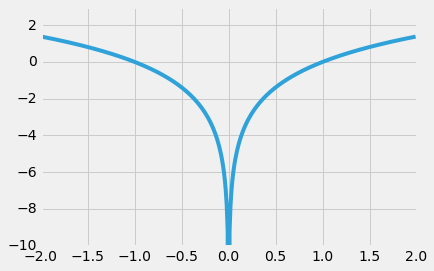

(-2.0, 2.0, -10, 3)

In [7]:
x = np.arange(-2,2,.01)
y = np.log(x**2)
plt.plot(x,y,linewidth=4)
plt.axis(ymin=-10,ymax=3)


In [49]:
q_star

array([ 7.76635162,  0.20801511,  0.22568179,  0.19931087,  0.1391093 ,
        0.22233732,  0.28203204,  0.17459906,  0.18502549,  0.20461548,
        0.25191849,  0.26478545,  0.17560076,  0.21842862,  0.24653097,
        0.27346253,  0.22866345,  0.23135401,  0.23644525,  0.25089614,
        0.21711835,  0.27364547,  0.27813757,  0.30148695,  0.22827011,
        0.24036417])

In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import numpy as np
import cvxpy as cvx

from model.distrs import StudentTDistribution,DiscreteDistribution,NormalDistribution
from model.distrs import E,Var,Std
import model.synth_data as synth
import model.utility as ut
import model.problem as pr

from helper.stats import five_stats

import matplotlib.pyplot as plt

In [26]:
p = 25
n_true = 50000
n_experiments = 500
λ = 3
δ = 0.2
ns = np.arange(25,525,25)

#Utility
β = 1
r_threshold = 60
u = ut.LinearPlateauUtility(β,r_threshold)

Rf = 0 

In [27]:
# Continuous market distribution
R_true = NormalDistribution(8,10)
X_true = [1/np.sqrt(2)*StudentTDistribution(ν=4) for _ in range(p)]
M_true = synth.GaussianMarket(X_true,R_true)

In [28]:
# Discretized market model 
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [29]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

In [30]:
R_star = p_star.insample_cost
R_star_q_star = R_star(q_star)
CE_star = p_star.insample_CE
CE_star_q_star = CE_star(q_star)

In [31]:
# Results placeholder
qs = np.zeros(shape=(len(ns),n_experiments,p+1))
CEs_ins = np.empty(shape=(n_experiments,len(ns)))
CEs_oos = np.empty(shape=(n_experiments,len(ns)))

In [32]:
# About 5minutes running time.
for i,n in enumerate(ns):
    prs = pr.ProblemsDistribution(M,n,λ,u,Rf)
    prs.sample(n_experiments)
    qs[i,:,:] = prs.qs
    CEs_ins[:,i] = prs.CEs_ins
    CEs_oos[:,i] = prs.CEs_oos

Sampling 500 problems of size 500 × 26


Sampling 500 problems of size 475 × 26


Sampling 500 problems of size 450 × 26


Sampling 500 problems of size 425 × 26


Sampling 500 problems of size 400 × 26


Sampling 500 problems of size 375 × 26


Sampling 500 problems of size 350 × 26


Sampling 500 problems of size 325 × 26


Sampling 500 problems of size 300 × 26


Sampling 500 problems of size 275 × 26


Sampling 500 problems of size 250 × 26


Sampling 500 problems of size 225 × 26


Sampling 500 problems of size 200 × 26


Sampling 500 problems of size 175 × 26


Sampling 500 problems of size 150 × 26


Sampling 500 problems of size 125 × 26


Sampling 500 problems of size 100 × 26


Sampling 500 problems of size 75 × 26


Sampling 500 problems of size 50 × 26


Sampling 500 problems of size 25 × 26


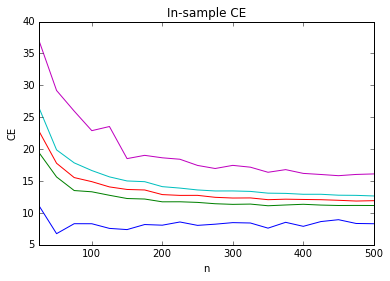

In [47]:
plt.plot(*five_stats(CEs_ins,ns));
plt.xlabel('n')
plt.ylabel('CE')
plt.title('In-sample CE')
plt.axis(xmin=25);

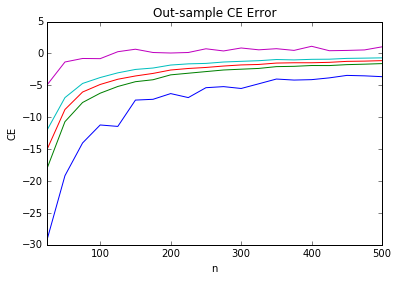

In [46]:
plt.plot(*five_stats(CEs_oos-CEs_ins,ns))
plt.xlabel('n')
plt.ylabel('CE')
plt.title('Out-sample CE Error')
plt.axis(xmin=25);

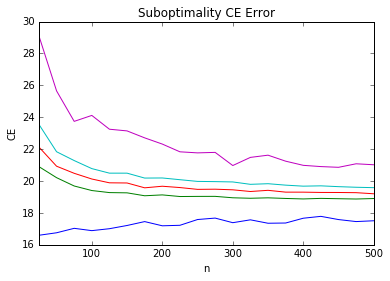

In [50]:
plt.plot(*five_stats(CE_star_q_star - CEs_oos,ns));
plt.xlabel('n')
plt.ylabel('CE')
plt.axis(xmin=25)
plt.title('Suboptimality CE Error');

In [0]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
import numpy as np
import cvxpy as cvx

from model.distrs import StudentTDistribution,DiscreteDistribution,NormalDistribution
from model.distrs import E,Var,Std
import model.synth_data as synth
import model.utility as ut
import model.problem as pr

from helper.stats import five_stats

import matplotlib.pyplot as plt

In [73]:
ps = np.arange(10,41)
p_true = max(ps)
ns = np.floor(0.4*p**2)
n_true = 50000
n_experiments = 50
λ = 3
δ = 0.2

#Utility
β = 1
r_threshold = 60
u = ut.LinearPlateauUtility(β,r_threshold)

Rf = 0 

In [67]:
np.array([ps,ns]).T

array([[  10.,   40.],
       [  11.,   48.],
       [  12.,   57.],
       [  13.,   67.],
       [  14.,   78.],
       [  15.,   90.],
       [  16.,  102.],
       [  17.,  115.],
       [  18.,  129.],
       [  19.,  144.],
       [  20.,  160.],
       [  21.,  176.],
       [  22.,  193.],
       [  23.,  211.],
       [  24.,  230.],
       [  25.,  250.],
       [  26.,  270.],
       [  27.,  291.],
       [  28.,  313.],
       [  29.,  336.],
       [  30.,  360.],
       [  31.,  384.],
       [  32.,  409.],
       [  33.,  435.],
       [  34.,  462.],
       [  35.,  490.],
       [  36.,  518.],
       [  37.,  547.],
       [  38.,  577.],
       [  39.,  608.],
       [  40.,  640.]])

In [78]:
# True market
R_true = NormalDistribution(8,10)
X_true = [1/np.sqrt(2)*StudentTDistribution(ν=4) for _ in range(p_true)]
M_true = synth.GaussianMarket(X_true,R_true)

# Discretized market
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [0]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

In [77]:
R_star = p_star.insample_cost
R_star_q_star = R_star(q_star)
CE_star = p_star.insample_CE
CE_star_q_star = CE_star(q_star)

In [76]:
R_star_q_star

-29.985311893556656

In [0]:
# Results placeholder
qs = np.zeros(shape=(len(ns),n_experiments,p+1))
CEs_ins = np.empty(shape=(n_experiments,len(ns)))
CEs_oos = np.empty(shape=(n_experiments,len(ns)))